# Milling Notebook


In [69]:
from liftout import utils
from liftout.fibsem import milling
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%precision 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'%.2f'

{'lamella_width': 1.2e-05, 'lamella_height': 8e-06, 'total_cut_height': 1e-05, 'milling_depth': 5e-06, 'milling_current': 2.4e-09, 'hfw': 0.00015, 'protocol_stages': [{'milling_current': 2.4e-09, 'offset': 5e-06, 'trench_height': 3e-06}, {'milling_current': 2.4e-09, 'offset': 5e-06, 'trench_height': 8e-06}]}


In [75]:
settings = utils.load_config("../protocol_liftout.yml") 
protocol_stages = []
for stage_settings in settings["new_lamella"]["protocol_stages"]:
    tmp_settings = settings["new_lamella"].copy()
    tmp_settings.update(stage_settings)
    protocol_stages.append(tmp_settings)

print(protocol_stages[0])


{'lamella_width': 1.2e-05, 'lamella_height': 8e-06, 'total_cut_height': 1e-05, 'milling_depth': 5e-06, 'milling_current': 2.4e-09, 'hfw': 0.00015, 'protocol_stages': [{'milling_current': 2.4e-09, 'offset': 2e-06, 'trench_height': 2e-06}, {'milling_current': 2.4e-09, 'offset': 0.0, 'trench_height': 5e-06}], 'offset': 2e-06, 'trench_height': 2e-06}


milling: protocol stage 1 of 2
----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  2e-06  Trench Height:  2e-06
Centres:  6.999999999999999e-06 -6.5000000000000004e-06
Upper Area:  5.999999999999999e-06 : 8e-06
Lower Area:  -7.000000000000001e-06 : -6e-06
Cleaning Cross Section (TOP): 0, 6.999999999999999e-06, 2e-06
Cleaning Cross Section (BOT): 0, -6.5000000000000004e-06, 2e-06


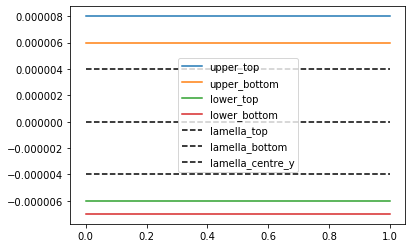

milling: protocol stage 2 of 2
----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  0.0  Trench Height:  5e-06
Centres:  6.5000000000000004e-06 -5.25e-06
Upper Area:  4.000000000000001e-06 : 9e-06
Lower Area:  -6.5e-06 : -4e-06
Cleaning Cross Section (TOP): 0, 6.5000000000000004e-06, 5e-06
Cleaning Cross Section (BOT): 0, -5.25e-06, 5e-06


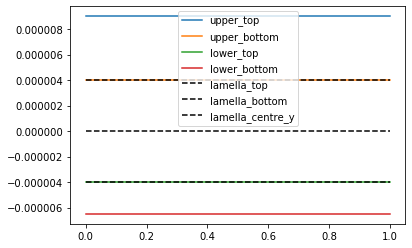

In [78]:
lamella_width = settings["new_lamella"]["lamella_width"]
lamella_height = settings["new_lamella"]["lamella_height"]

offsets = [2e-6, 0e-6]
trench_heights = [2e-6, 5e-6]


# for offset, trench_height in zip(offsets, trench_heights):
for stage_number, stage_settings in enumerate(protocol_stages):
    print(f"milling: protocol stage {stage_number + 1} of {len(protocol_stages)}")
    
          
    centre_x = 0
    centre_y = 0
    
    offset = stage_settings["offset"]
    trench_height = stage_settings["trench_height"]
    lower_trench_height = trench_height / 2 

    centre_upper_y = centre_y + (lamella_height / 2 + trench_height / 2 + offset)
    centre_lower_y = centre_y - (lamella_height / 2 + lower_trench_height / 2 + offset)

    print("----------------------")
    print("Width: ", lamella_width) 
    print("Height: ", lamella_height)
    print("Offset: ", offset, " Trench Height: ",  trench_height)
    print("Centres: ", centre_upper_y, centre_lower_y)
    
    upper_bottom, upper_top = centre_upper_y - trench_height/2, centre_upper_y + trench_height/2
    lower_bottom, lower_top = centre_lower_y - lower_trench_height/2, centre_lower_y + lower_trench_height/2
    print("Upper Area: ",upper_bottom, ":", upper_top)
    print("Lower Area: ", lower_bottom, ":", lower_top)


    print(f"Cleaning Cross Section (TOP): {centre_x}, {centre_upper_y}, {trench_height}")
    print(f"Cleaning Cross Section (BOT): {centre_x}, {centre_lower_y}, {trench_height}")
   

    
    plt.plot([upper_top, upper_top], label="upper_top")
    plt.plot([upper_bottom, upper_bottom], label="upper_bottom")
    plt.plot([lower_top, lower_top], label="lower_top")
    plt.plot([lower_bottom, lower_bottom], label="lower_bottom")
    
    plt.plot([lamella_height /2, lamella_height /2], "k--", label="lamella_top")
    plt.plot([-lamella_height /2, -lamella_height /2], "k--", label="lamella_bottom")
    plt.plot([centre_y, centre_y], "k--", label="lamella_centre_y")

    
    plt.legend(loc="best")
    plt.show()
    
    

In [84]:
for stage_number, stage_settings in enumerate(protocol_stages):

    lp, up = milling.mill_trench_patterns(microscope=None, settings=stage_settings)
    
    

----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  2e-06  Trench Height:  2e-06
Centres:  6.999999999999999e-06 -6.5000000000000004e-06
Upper Area:  5.999999999999999e-06 : 8e-06
Lower Area:  -7.000000000000001e-06 : -6e-06
Cleaning Cross Section (TOP): 0, 6.999999999999999e-06, 2e-06
Cleaning Cross Section (BOT): 0, -6.5000000000000004e-06, 2e-06
----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  0.0  Trench Height:  5e-06
Centres:  6.5000000000000004e-06 -5.25e-06
Upper Area:  4.000000000000001e-06 : 9e-06
Lower Area:  -6.5e-06 : -4e-06
Cleaning Cross Section (TOP): 0, 6.5000000000000004e-06, 5e-06
Cleaning Cross Section (BOT): 0, -5.25e-06, 5e-06


In [85]:
milling.new_mill_trenches(microscope =None, settings= settings)

----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  2e-06  Trench Height:  2e-06
Centres:  6.999999999999999e-06 -6.5000000000000004e-06
Upper Area:  5.999999999999999e-06 : 8e-06
Lower Area:  -7.000000000000001e-06 : -6e-06
Cleaning Cross Section (TOP): 0, 6.999999999999999e-06, 2e-06
Cleaning Cross Section (BOT): 0, -6.5000000000000004e-06, 2e-06
----------------------
Width:  1.2e-05
Height:  8e-06
Offset:  0.0  Trench Height:  5e-06
Centres:  6.5000000000000004e-06 -5.25e-06
Upper Area:  4.000000000000001e-06 : 9e-06
Lower Area:  -6.5e-06 : -4e-06
Cleaning Cross Section (TOP): 0, 6.5000000000000004e-06, 5e-06
Cleaning Cross Section (BOT): 0, -5.25e-06, 5e-06


NotImplemented